In [59]:
from os.path import join
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_root = '/data/siim-isic-melanoma/processed/'

In [6]:
train_df = pd.read_csv(join(data_root, 'train.csv'))
test_df = pd.read_csv(join(data_root, 'test.csv'))

In [8]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [54]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


## Check bias

In [13]:
target_grouping = train_df.groupby('target')

In [44]:
attributes_to_check = ['sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis']

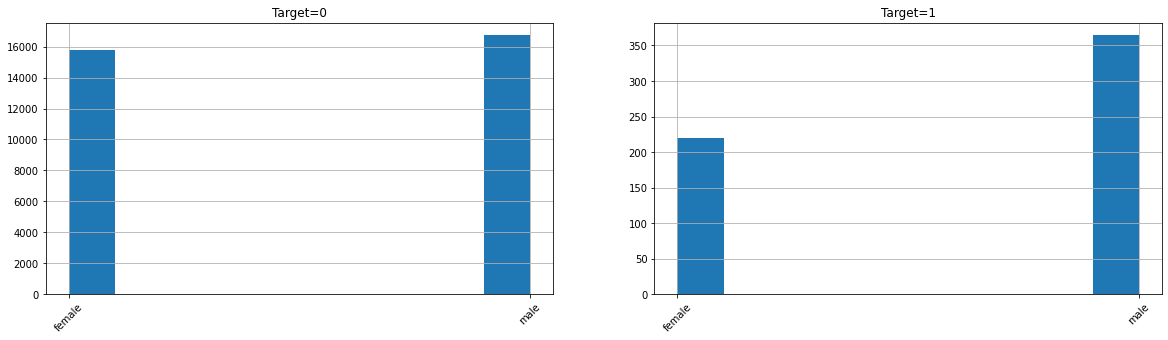

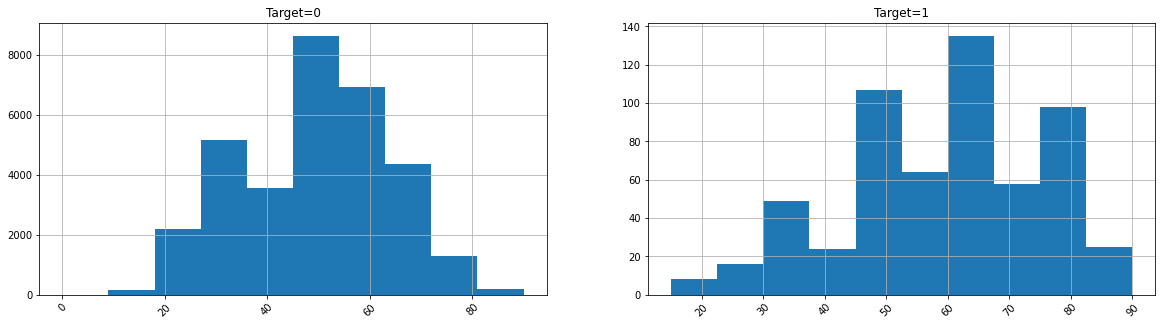

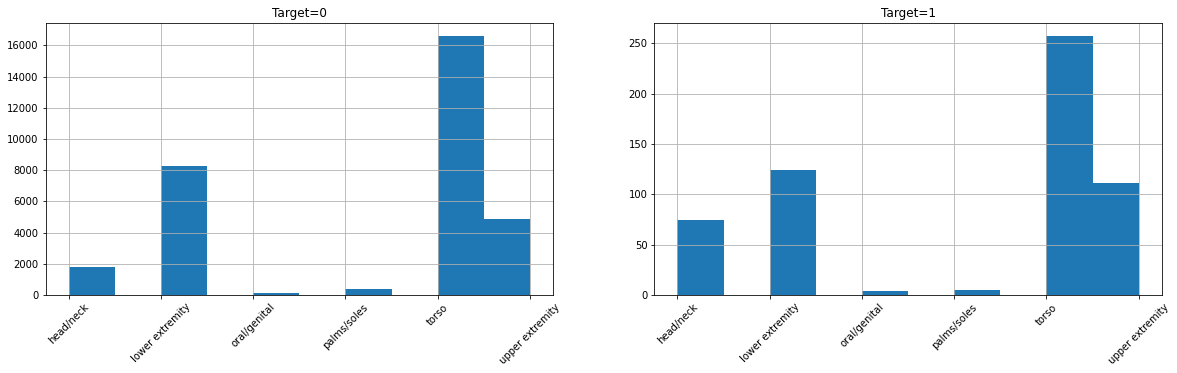

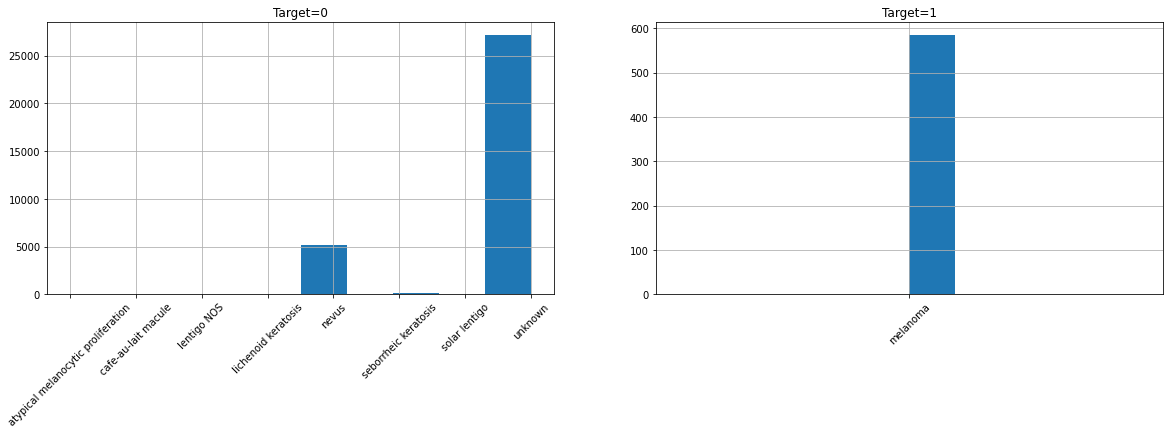

In [52]:
for attribute in attributes_to_check:
    num_unique = len(target_grouping.groups)
    f, ax = plt.subplots(1, num_unique, figsize=(10 * num_unique, 5))
    for index, target in enumerate(target_grouping.groups):
        target_df = target_grouping.get_group(target)
        target_df.sort_values(attribute)[attribute].hist(ax=ax[index], )
        ax[index].set_title(f'Target={target}')
        for tick in ax[index].get_xticklabels():
            tick.set_rotation(45)
    plt.show()

## Check patient leakage

In [11]:
train_patients = train_df['patient_id'].unique()
test_patients = test_df['patient_id'].unique()

In [12]:
assert not [patient for patient in test_patients if patient in train_patients]

### Check patient label consistency

In [62]:
count = 0
for patient in tqdm(train_patients):
    patient_df = train_df[train_df['patient_id'] == patient]
    try:
        assert len(patient_df['target'].unique()) == 1
    except:
        count += 1

100%|██████████| 2056/2056 [00:05<00:00, 396.66it/s]


In [63]:
print(count)

427


In [64]:
len(train_patients)

2056